### Simple method for finding images with high similarity
The similarity threshold for images that are indentical will tend to go down as the iamge dataset get's bigger

In [1]:
import os
from pathlib import Path
from src.features.get_image_features import get_features

C:\Users\mico-\anaconda3\envs\clustering\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
from utils import get_root_path
# use Resnet to create features
batch = 20
image_path = os.path.join(get_root_path(), 'data')
features, image_paths = get_features(image_path, batch)

Running the model inference: 100%|██████████| 8/8 [00:13<00:00,  1.73s/it]


In [5]:
# map index to image path, this makes it easier to do lookup later
data = {}
for e, i in enumerate(image_paths):
    data[e] = i

In [10]:
data

{0: 'c:\\users\\mico-\\documents\\code\\image-clustering\\data\\images\\A0Fs7bW8G76CMw_0_1501822682706300928.jpg',
 1: 'c:\\users\\mico-\\documents\\code\\image-clustering\\data\\images\\qvtZsko_hVwGT3it_1501837827558064128.jpg',
 2: 'c:\\users\\mico-\\documents\\code\\image-clustering\\data\\images\\FNcnRmpXwAYyLjj_1501822328136634368.jpg',
 3: 'c:\\users\\mico-\\documents\\code\\image-clustering\\data\\images\\FNbO235X0AwHCca_1501819630993780736.jpg',
 4: 'c:\\users\\mico-\\documents\\code\\image-clustering\\data\\images\\FNeJLfAXwAMdoPs_1501819860212502528.jpg',
 5: 'c:\\users\\mico-\\documents\\code\\image-clustering\\data\\images\\F4zSnuPvmryWx71c_1501837804824764416.jpg',
 6: 'c:\\users\\mico-\\documents\\code\\image-clustering\\data\\images\\O0V9ffKv4PsJRqig_1501837823657361408.jpg',
 7: 'c:\\users\\mico-\\documents\\code\\image-clustering\\data\\images\\FNWA0-_XoAgAppH_1501837336451203072.jpg',
 8: 'c:\\users\\mico-\\documents\\code\\image-clustering\\data\\images\\FNd2D7_X0AAN

In [6]:
# remember to pip install annoy
from annoy import AnnoyIndex
# create an annoy tree for quering
index = AnnoyIndex(2048, "angular")
for e, i in enumerate(features):
    index.add_item(e, i)

In [7]:
# Define the number of tree and save the index - more trees gives higher precision when querying
index.build(40)
index.save('index.ann')

True

In [23]:
index.get_nns_by_vector(features[5], 15, include_distances=True)

([5, 42, 46, 68, 25, 127, 105, 134, 33, 99, 101, 112, 137, 74, 9],
 [0.00020032879547215998,
  0.00020032879547215998,
  0.00020032879547215998,
  0.10358105599880219,
  0.30920273065567017,
  0.3278947174549103,
  0.3543281853199005,
  0.376427561044693,
  0.7335749268531799,
  0.7439370155334473,
  0.7598852515220642,
  0.7603188753128052,
  0.7700322866439819,
  0.777174174785614,
  0.7792626619338989])

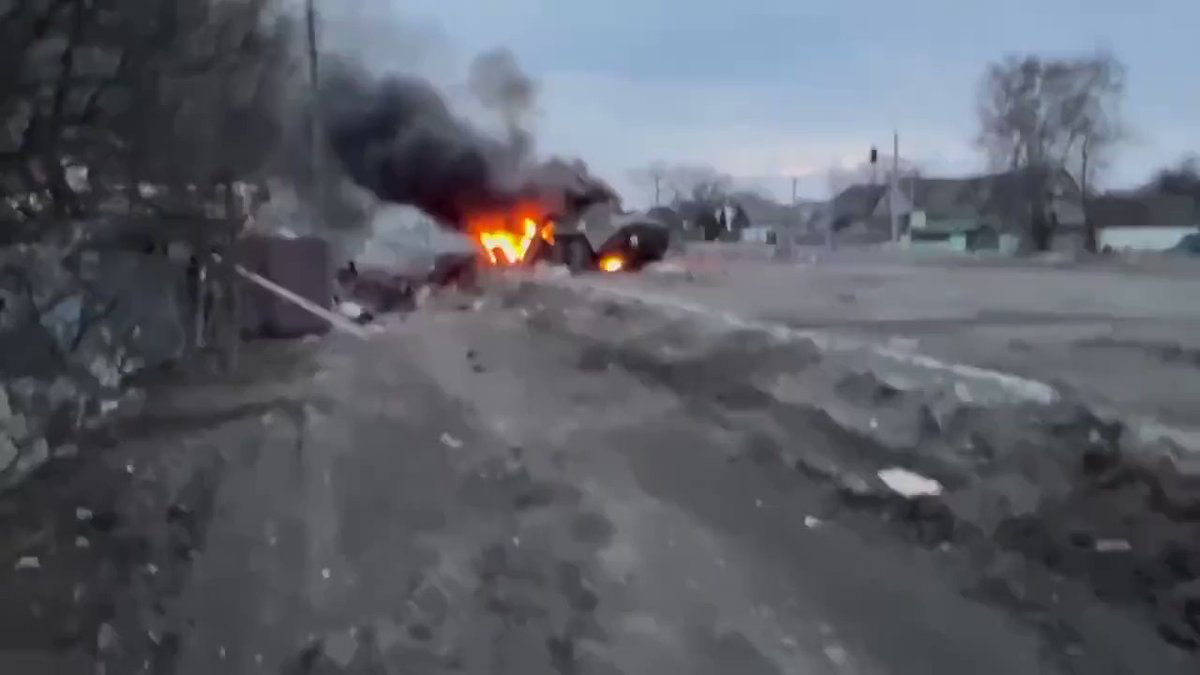

In [24]:
from PIL import Image
Image.open(data[5]).convert('RGB')

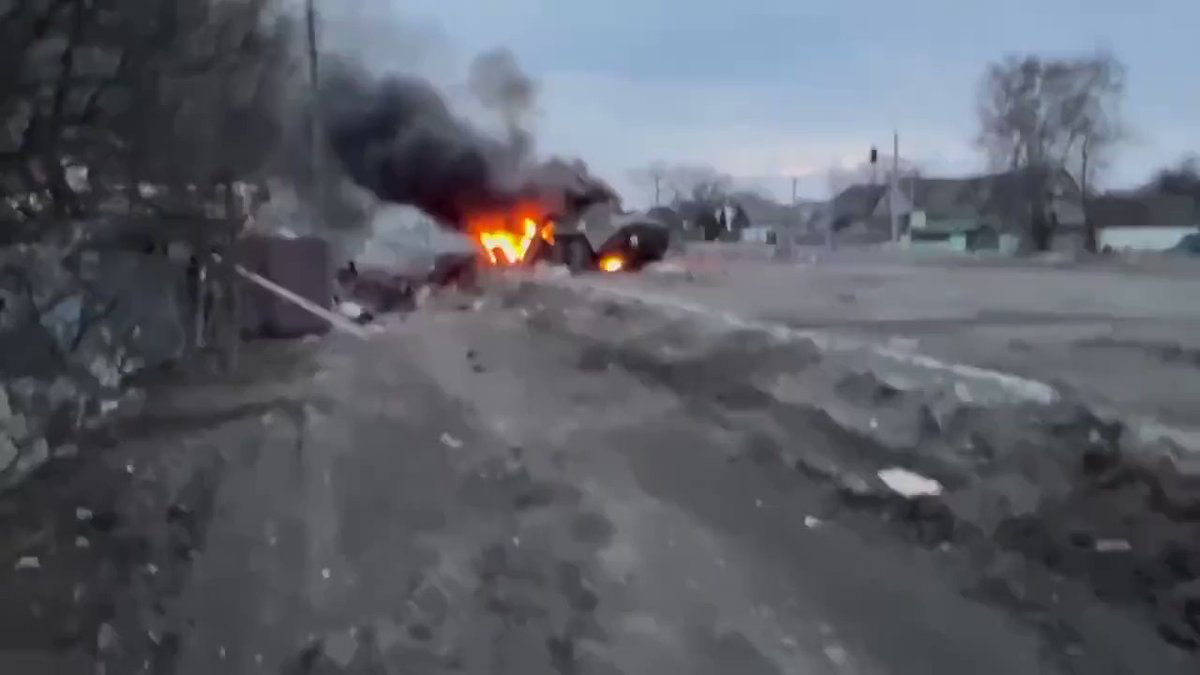

In [25]:
Image.open(data[42]).convert('RGB')

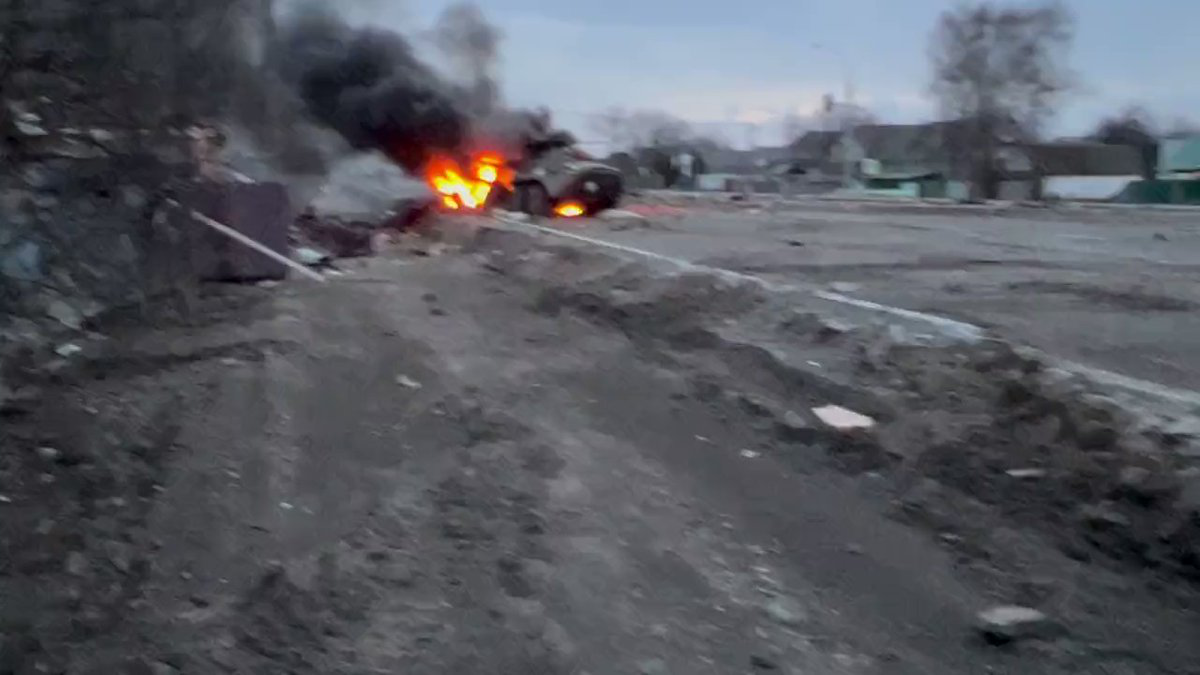

In [32]:
Image.open(data[105]).convert('RGB')

In [34]:
# create a dict of image paths and the path to their duplicates
def find_duplicates(n_neighbors=30, threshold=0.1):
    duplicates_dict = {}
    for image, path in zip(features, image_paths):
        neighbors = index.get_nns_by_vector(image, n_neighbors, include_distances=True)
        duplicates = [neighbors[0][e] for e, x in enumerate(neighbors[1]) if x < threshold]
        duplicates_dict[path] = {"duplicates": [image_paths[x] for x in duplicates]}
    return duplicates_dict
    

In [43]:
dupes = find_duplicates(30, 0.55)

In [36]:
import matplotlib.pyplot as plt

def plot_img(filename):
    img = Image.open(filename).convert('RGB')
    plt.figure()
    plt.imshow(img)

142

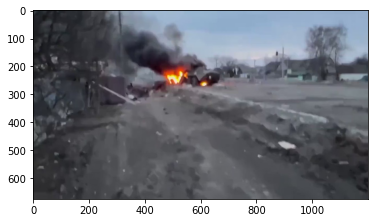

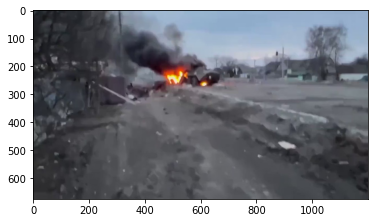

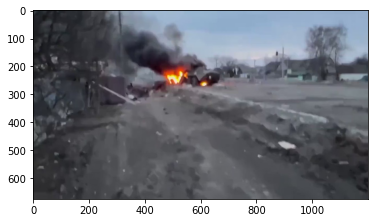

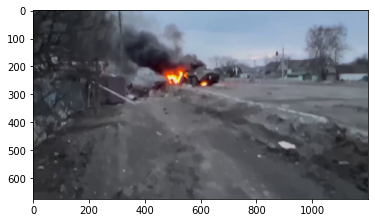

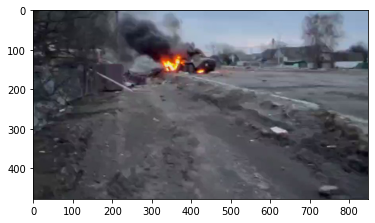

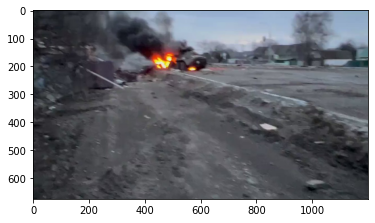

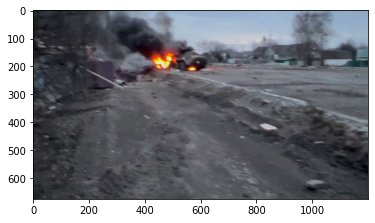

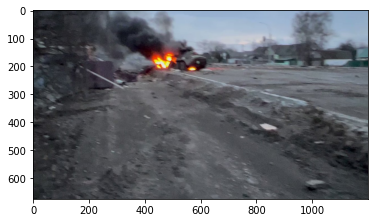

In [45]:
# plot each image and theits duplicates
for i in dupes[list(dupes.keys())[5]]["duplicates"]:
    plot_img(i)
len(list(dupes.keys()))